1. Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv ('ecommerce_dataset.csv')
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB
None


2. Data cleaning & Preprocessing

In [6]:
# check for missing values
df.isnull().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [9]:
# fill or remove missing values
df['Discount Name'].fillna(value=pd.NA, inplace=True)
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,<NA>,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


3. Exploratory Data Analysis (EDA)

3.1 Age group distribution

In [ ]:
# Define the correct order
age_order = ["under 18","18-25", "25-45", "45-60", "60 and above"]

# Convert the 'Age Group' column to a categorical type with the specified order
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_order, ordered=True)

# Sort the DataFrame by the defined order
df = df.sort_values(by="Age Group")

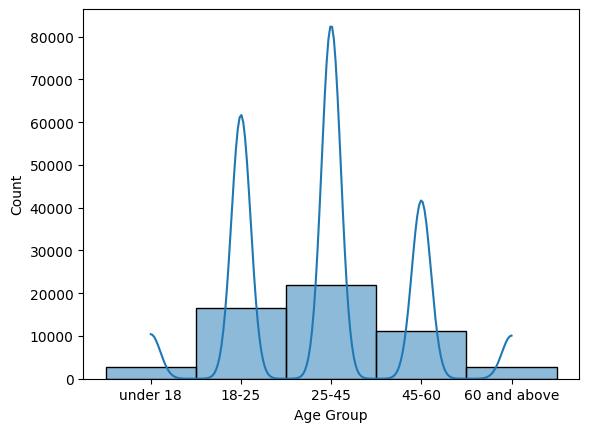

In [15]:
sns.histplot(df, x="Age Group", kde=True, discrete=True)
# plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

3.2 Revenue Trend over time

In [20]:
# convert purchase date to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

/var/folders/pz/x922ffzx1z77z1strd8qk2qh0000gn/T/ipykernel_13310/3418042911.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])


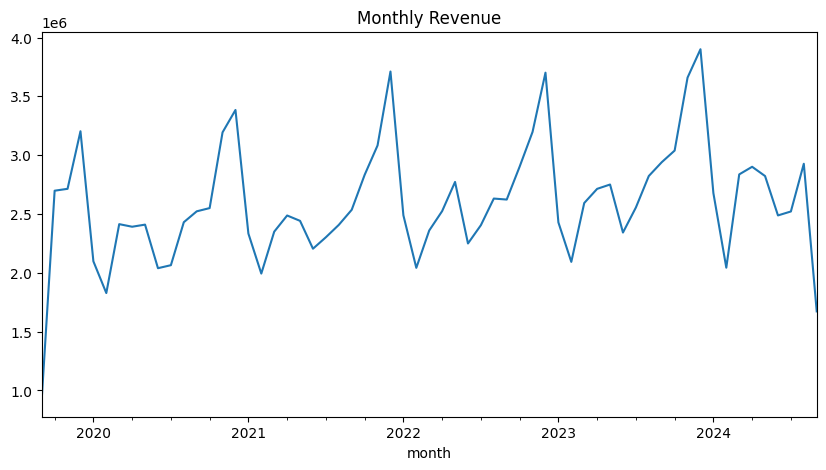

In [21]:
# df.head()
df['month'] = df['Purchase Date'].dt.to_period('M')
revenue_trend = df.groupby('month')['Net Amount'].sum()
revenue_trend.plot(kind='line', figsize=(10,5), title="Monthly Revenue")
plt.show()

3.3 Customers behavior

In [23]:
# Top customers
top_customers = df.groupby('CID')['Net Amount'].sum().sort_values(ascending=False).head(10)
print(top_customers)

CID
308795    27966.338575
838253    27960.864050
938373    27948.780325
551839    27646.756075
949541    27120.619750
700005    26495.393450
583020    26183.231350
949729    25866.166700
698782    25661.707900
251857    25551.689175
Name: Net Amount, dtype: float64


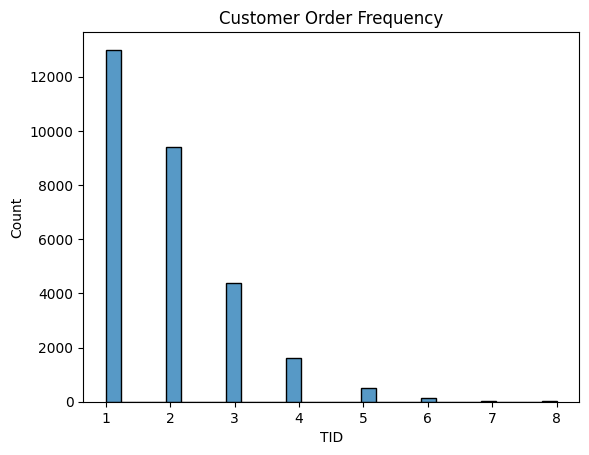

In [24]:
# Repeated purchases
repeat_customers = df.groupby('CID')['TID'].count()
sns.histplot(repeat_customers, bins=30)
plt.title("Customer Order Frequency")
plt.show()


3.4 Customer Retention